# Baseline Model

## Table of Contents
1. [Model Choice](#model-choice)
2. [Feature Selection](#feature-selection)
3. [Implementation](#implementation)
4. [Evaluation](#evaluation)


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import SGDOneClassSVM
from sklearn.model_selection import train_test_split
# Import your chosen baseline model
# Example: from sklearn.linear_model import LogisticRegression


## Model Choice

[Explain why you've chosen a particular model as the baseline. This could be a simple statistical model or a basic machine learning model. Justify your choice.]
One class model since the data contains only potential dig sites, so a outlier search is usefull here. 


## Feature Selection

[Indicate which features from the dataset you will be using for the baseline model, and justify your selection.]


In [2]:
# Load the dataset
# Replace 'your_dataset.csv' with the path to your actual dataset
df = pd.read_csv('/workspaces/Machine_learning_tensorflow/1_DatasetCharacteristics/Data_final.csv')

# Feature selection
# Example: Selecting only two features for a simple baseline model
X = df[['Latitude','Longitude','Human Activity Index','Climate Change Impact','Sonar Radar Detection','Looting Risk (%)', 'Ptolomaer',
        'Erste Zwischenzeit' ,'Antike', 'Spätzeit', 'Dritte Zwischenzeit', 'Neues Reich','Zweite Zwischenzeit','Römisch','Mittleres Reich',
        'Bronze','Demotisch','Griechisch','Koptisch','Hieroglyphen','Keilschrift','Hieratisch','Kalkstein','Gips','Gold','Holz','Sandstein','Lehm','Granit','Ziegel']]
y = df['AI Prediction Score']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Implementation

[Implement your baseline model here.]



In [3]:
# Initialize and train the baseline model
# Example for a classification problem using Logistic Regression
# model = LogisticRegression()
# model.fit(X_train, y_train)

# Your implementation code here
clf = linear_model.SGDOneClassSVM(random_state=42)
clf.fit(X_train,y_train)

SGDOneClassSVM(random_state=42)

## Evaluation

[Clearly state what metrics you will use to evaluate the model's performance. These metrics will serve as a starting point for evaluating more complex models later on.]



In [15]:
# Evaluate the baseline model
# Example for a classification problem
#y_test=df[df['AI Prediction Score'] != 0] = 1
from sklearn.metrics import accuracy_score
#print(df.head())
X_test=[25.979264261610137,33.0875324425252,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0]
X_test2=np.reshape(X_test,(1, -1))
#X_test=np.reshape(X_test,(1, -1))
y_pred = clf.predict(X_test2)
#accuracy = accuracy_score(y_test, y_pred)

print(y_pred)
# For a regression problem, you might use:
#mse = mean_squared_error(y_test, y_pred)

# Your evaluation code here


[-1]


/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SGDOneClassSVM was fitted with feature names
  warnings.warn(



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
                             OLS Regression Results                            
Dep. Variable:     AI Prediction Score   R-squared:                       0.086
Model:                             OLS   Adj. R-squared:                  0.041
Method:                  Least Squares   F-statistic:                     1.892
Date:                 Tue, 01 Jul 2025   Prob (F-statistic):             0.0136
Time:                         14:39:09   Log-Likelihood:                -1613.0
No. Observations:                  400   AIC:                             3266.
Df Residuals:                      380   BIC:                             3346.
Df Model:                           19                                         
Covariance Type:             nonrobust                                         
           

/tmp/ipykernel_7310/2777836411.py:59: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color="red")


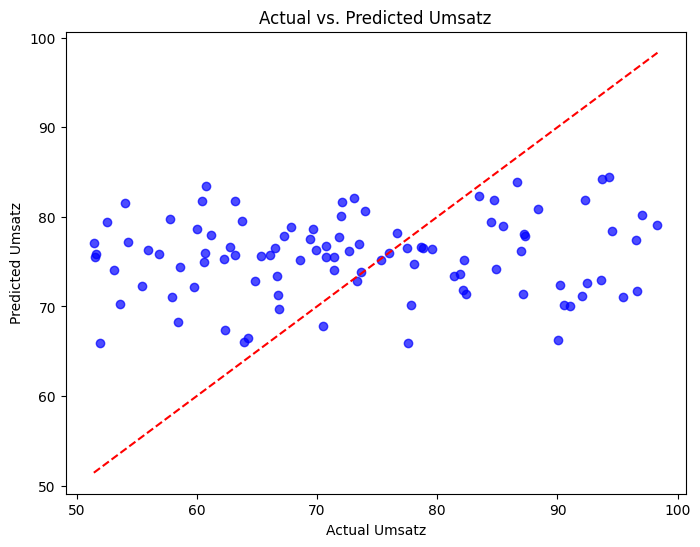

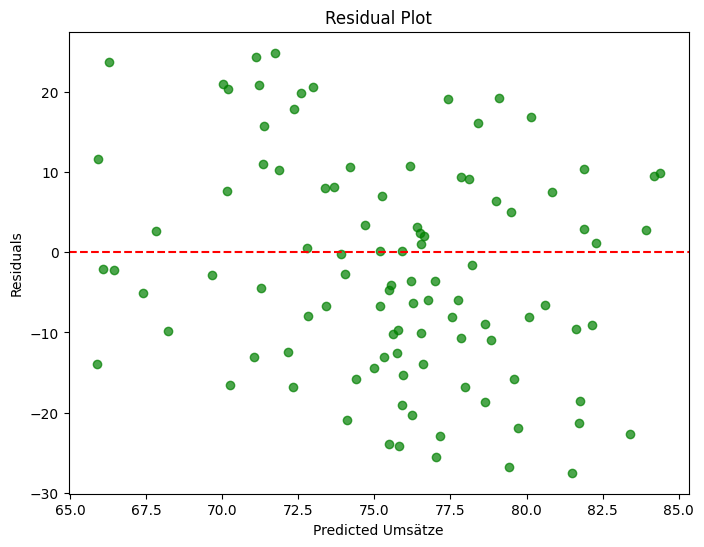

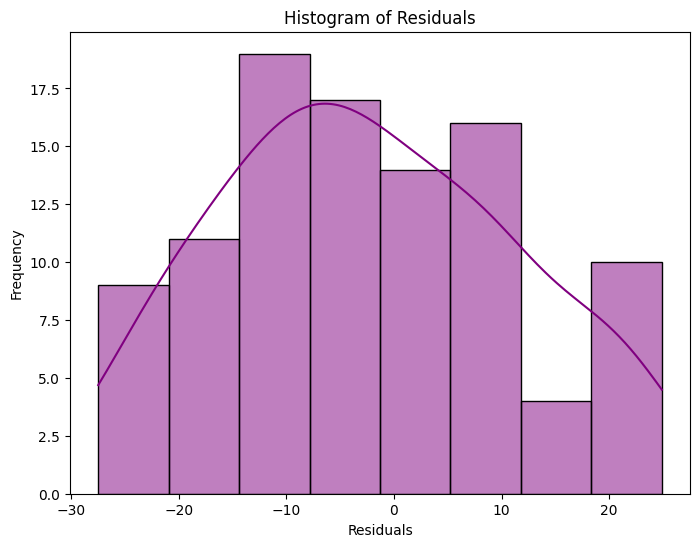

/tmp/ipykernel_7310/2777836411.py:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette="Blues_d")


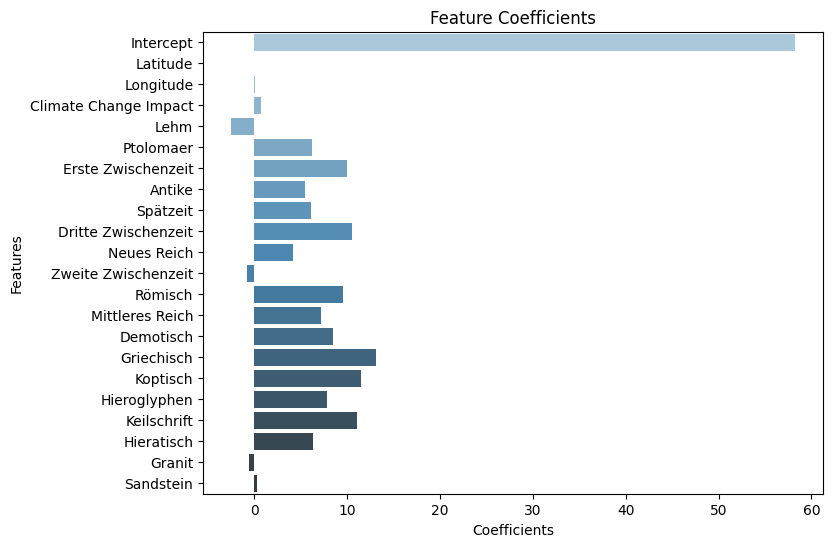

In [5]:
# Import necessary libraries
import pandas as pd  # Data manipulation and handling
%pip install statsmodels
import statsmodels as sm
import statsmodels.api as sm  # Building and summarizing regression models
from sklearn.preprocessing import StandardScaler  # Scaling features for regression
from sklearn.model_selection import train_test_split  # Splitting data into train and test sets
import matplotlib.pyplot as plt  # Visualization library
import seaborn as sns  # Advanced data visualizations

# Load the dataset 

data=df
#'Latitude','Longitude','Human Activity Index','Climate Change Impact','Sonar Radar Detection','Looting Risk (%)', 'Ptolomaer',
        #'Erste Zwischenzeit' ,'Antike', 'Spätzeit', 'Dritte Zwischenzeit', 'Neues Reich','Zweite Zwischenzeit','Römisch','Mittleres Reich',
       # 'Bronze','Demotisch','Griechisch','Koptisch','Hieroglyphen','Keilschrift','Hieratisch','Kalkstein','Gips','Gold','Holz','Sandstein','Lehm','Granit','Ziegel'
features = ['Latitude','Longitude','Climate Change Impact','Lehm' ,'Ptolomaer',
          'Erste Zwischenzeit' ,'Antike', 'Spätzeit', 'Dritte Zwischenzeit', 'Neues Reich','Zweite Zwischenzeit','Römisch','Mittleres Reich',
          'Demotisch','Griechisch','Koptisch','Hieroglyphen','Keilschrift','Hieratisch','Granit','Sandstein']
X = data[features] 
y=data['AI Prediction Score']

# Scale the feature data to standardize the range
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train = X_train[features]
y_train = y_train#['AI Prediction Score']

X_test = X_test[features]
y_test = y_test#['AI Prediction Score']

X_validation=X_test[features]
y_validation=y_test #['AI Prediction Score']


# Add a constant term to the training data for the regression intercept
X_train = sm.add_constant(X_train)

# Train the linear regression model using Statsmodels
model = sm.OLS(y_train.astype(float), X_train.astype(float)).fit()

# Print the summary of the regression model
# Includes metrics like R-squared, coefficients, and p-values for each feature
print(model.summary())

# Make predictions on the test set
X_test = sm.add_constant(X_test)  # Add constant to test set for predictions
predictions = model.predict(X_test.astype(float))
print("Predictions for test data:", predictions)

# Calculate Mean Absolute Percentage Error (MAPE) for error evaluation
mape = (abs((y_test - predictions) / y_test).mean()) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Scatter plot: Actual vs. Predicted Umsatz
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color="red")
plt.xlabel("Actual Umsatz")
plt.ylabel("Predicted Umsatz")
plt.title("Actual vs. Predicted Umsatz")
plt.show()

# Calculate residuals (differences between actual and predicted Umsätze)
residuals = y_test - predictions

# Residual plot: Predicted Umsätze vs. Residuals
plt.figure(figsize=(8, 6))
plt.scatter(predictions, residuals, alpha=0.7, color="green")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted Umsätze")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# Histogram of residuals to check normality
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color="purple")
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Create a DataFrame of model coefficients
coefficients = pd.DataFrame({
    'Feature': ['Intercept'] + features,
    'Coefficient': model.params
})

# Bar plot of feature coefficients
plt.figure(figsize=(8, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette="Blues_d")
plt.title("Feature Coefficients")
plt.xlabel("Coefficients")
plt.ylabel("Features")
plt.show()